# Insights into Melbourne's Housing Market: Using Machine Learning to Forecast Property Prices

In [243]:
import pandas as pd

In [244]:
# Save filepath in variable
melb_file = '../data/melb_data.csv'

In [245]:
melb_data = pd.read_csv(melb_file)

In [246]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


The data shows the max value for YearBuilt is 2018. This data has fairly recently updated data.

### Cleaning the Data

The DataFrame shows there are 13580 entries. We will drop the rows in BuildingArea, YearBuilt and CouncilArea since they are showing values that are less than the entries indicating null values.

In [247]:
#Drop rows with null values
melb_data.dropna(inplace=True)

In [248]:
# Rename column names
new_column_names = {'Lattitude': 'Latitude', 'Longtitude': 'Longitude'}
melb_data = melb_data.rename(columns=new_column_names)

melb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Latitude       6196 non-null   float64
 18  Longitude   

In [249]:
# Store price in a variable as the prediction target
y = melb_data.Price

### Selecting Training Variables

We will perform correlation analysis to determine what variables have a strong relationship to price.

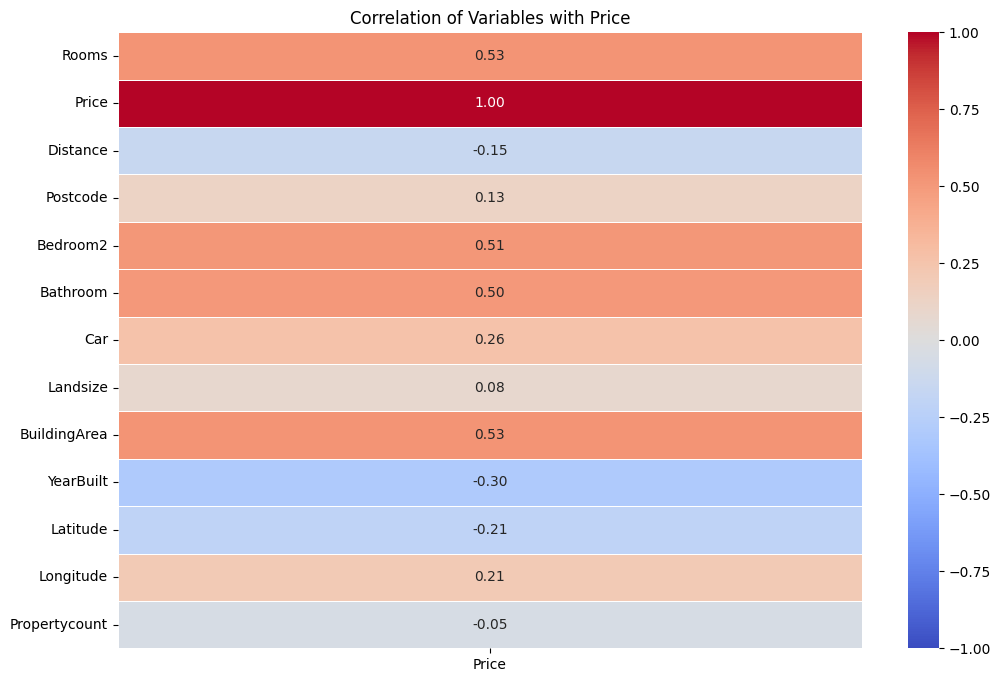

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
melb_df = melb_data.select_dtypes(include='number')

# Compute correlation of all variables to 'Price'
price_corr = round(melb_df.corr()['Price'], 2)

plt.figure(figsize=(12, 8))
sns.heatmap(price_corr.to_frame(), vmin=-1, vmax=1, center=0, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Variables with Price')
plt.show()

The correlation matrix above shows four variables with the strongest correlations:
- Rooms
- Bathroom
- Bedroom2
- BuildingArea 

**Correlation coefficients** for these variables fall within a range of 0.50 to 0.53. These can be added to the training and validation data. We will also use Car, YearBuilt, Latitude and Longitude.

In [251]:
# Select features for prediction
melb_feats = ['Rooms', 'Bathroom', 'BuildingArea', 'Bedroom2', 'Car', 'YearBuilt', 'Latitude', 'Longitude']
x = melb_data[melb_feats]

In [252]:
x.describe()

,Rooms,Bathroom,BuildingArea,Bedroom2,Car,YearBuilt,Latitude,Longitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,141.568645,2.902034,1.573596,1964.081988,-37.807904,144.990201
std,0.971079,0.711362,90.834824,0.970055,0.929947,38.105673,0.075850,0.099165
min,1.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370
25%,2.000000,1.000000,91.000000,2.000000,1.000000,1940.000000,-37.855438,144.926198
50%,3.000000,1.000000,124.000000,3.000000,1.000000,1970.000000,-37.802250,144.995800
75%,4.000000,2.000000,170.000000,3.000000,2.000000,2000.000000,-37.758200,145.052700
max,8.000000,8.000000,3112.000000,9.000000,10.000000,2018.000000,-37.457090,145.526350


### Choosing a Model

We will use a **decision tree** to make predictions for house prices in Melbourne.

In [253]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split data into parts to be used for training and another for validation
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)

melb_model = DecisionTreeRegressor(random_state=1)

melb_model.fit(train_x, train_y)

DecisionTreeRegressor(random_state=1)

In [254]:
print("Making predictions for the following 5 houses:")
print(val_x.head())

print("The predictions are")
print(melb_model.predict(val_x))

Making predictions for the following 5 houses:
      Rooms  Bathroom  BuildingArea  Bedroom2  Car  YearBuilt  Latitude  \
6048      3       3.0         155.0       3.0  2.0     2011.0 -37.77080   
9186      4       2.0         199.0       4.0  2.0     1980.0 -37.83539   
3991      3       2.0         122.0       3.0  1.0     1998.0 -37.80950   
5829      3       2.0         133.0       3.0  2.0     2006.0 -37.86380   
3616      6       6.0         365.0       6.0  3.0     1890.0 -37.80290   

      Longitude  
6048   144.8401  
9186   145.0431  
3991   144.9691  
5829   144.9820  
3616   145.0267  
The predictions are
[ 821000. 1312000.  990000. ... 1800000.  714000. 1950000.]


###  Validating the Model

In [255]:
from sklearn.metrics import mean_absolute_error

# Get predictions for validation data
val_predictions = melb_model.predict(val_x)

print(f"MEA: {round(mean_absolute_error(val_y, val_predictions), 2)}")

MEA: 256665.0


Above we see the **mean absolute error** for home price predictions is $256,664. Next we will try to tune this model.

In [256]:
# Function to compare different models with varying leaf nodes
def get_mae(max_leaf_nodes, train_X, val_X, train_Y, val_Y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_Y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_Y, preds_val)
    return(mae)

In [257]:
leaf_nodes = [5, 10, 200, 250, 500, 1000]
for max_leaf_nodes in leaf_nodes:
    my_mae = get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  324110
Max leaf nodes: 10  		 Mean Absolute Error:  301550
Max leaf nodes: 200  		 Mean Absolute Error:  241317
Max leaf nodes: 250  		 Mean Absolute Error:  240824
Max leaf nodes: 500  		 Mean Absolute Error:  240653
Max leaf nodes: 1000  		 Mean Absolute Error:  248327


The optimal leaf size is **500** as it has the lowest mean absolute error.

Since the mean absolute error is still around $240,000, we will try using the **random forest** algorithm.

In [258]:
from sklearn.ensemble import RandomForestRegressor

melb_forest = RandomForestRegressor(random_state=1)
melb_forest.fit(train_x, train_y)
melb_predictions = melb_forest.predict(val_x)
print(f"MEA: {round(mean_absolute_error(val_y, melb_predictions), 2)}")

MEA: 188769.78


The mean absolute error has decreased by over 67,895. Now we will try to improve this model.

In [259]:
def get_forest_mae(max_leaf_nodes, train_X, val_X, train_Y, val_Y):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_Y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_Y, preds_val)
    return(mae)

# Number of leaf nodes
leaves = [5, 10, 150, 200, 250, 500, 1000, 2000, 5000]

for leaf_nodes in leaves:
    my_mae = get_forest_mae(leaf_nodes, train_x, val_x, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  305251
Max leaf nodes: 10  		 Mean Absolute Error:  271401
Max leaf nodes: 150  		 Mean Absolute Error:  200684
Max leaf nodes: 200  		 Mean Absolute Error:  196488
Max leaf nodes: 250  		 Mean Absolute Error:  194034
Max leaf nodes: 500  		 Mean Absolute Error:  189348
Max leaf nodes: 1000  		 Mean Absolute Error:  187530
Max leaf nodes: 2000  		 Mean Absolute Error:  187371
Max leaf nodes: 5000  		 Mean Absolute Error:  187420


Adjusting the number of leaf nodes in each decision tree begins to increase the mean absolute error again after 2000. We will then adjust the number of decision trees using the **n_estimators** (default 100) argument.

In [260]:
# Number of decision trees
num_trees = [5, 10, 150, 200, 250, 500, 1000, 2000]
            
def forest_mae(estimators, max_leaf_nodes, train_X, val_X, train_Y, val_Y):
    model = RandomForestRegressor(n_estimators=estimators, max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_Y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_Y, preds_val)
    return(mae)

for trees in num_trees:
    the_mae = forest_mae(trees, 2000, train_x, val_x, train_y, val_y)
    print("Max decision trees: %d  \t\t Mean Absolute Error:  %d" %(trees, the_mae))

Max decision trees: 5  		 Mean Absolute Error:  210316
Max decision trees: 10  		 Mean Absolute Error:  199135
Max decision trees: 150  		 Mean Absolute Error:  188298
Max decision trees: 200  		 Mean Absolute Error:  188111
Max decision trees: 250  		 Mean Absolute Error:  187711
Max decision trees: 500  		 Mean Absolute Error:  187319
Max decision trees: 1000  		 Mean Absolute Error:  186754
Max decision trees: 2000  		 Mean Absolute Error:  186630


Again the number of decision trees has diminishing returns after 1000. For the best computational complexity and training time, we will use 1000 as the optimal number of decision trees.

In [261]:
# Test final model
melb_forest = RandomForestRegressor(random_state=1, n_estimators=1000, max_leaf_nodes=2000)
melb_forest.fit(train_x, train_y)
melb_predictions = melb_forest.predict(val_x)
print(f" MEA: {round(mean_absolute_error(val_y, melb_predictions), 2)}")

 MEA: 186754.03
